<a href="https://colab.research.google.com/github/TanujRohilla/CoLab/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

#Parameter Setting

In [0]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

#Defining training dataset

In [0]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
# n_samples = train_X.shape[0]

#Defining the tensorflow placeholder and variable

In [0]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")


#Defining model, cost function, and optimizer

In [0]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
# cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


#Build the model and execute on the training and testing data

In [0]:
# Start training
sess = tf.Session()
# Another option: with tf.Session() as sess:


# Run the initializer
sess.run(init)



Epoch: 0050 cost= 1.616958737 W= 0.18263106 b= 1.1272793
Epoch: 0050 cost= 1.510136843 W= 0.2191134 b= 1.1355708
Epoch: 0050 cost= 1.425546408 W= 0.2053252 b= 1.1330638
Epoch: 0050 cost= 2.270148993 W= 0.2508998 b= 1.1398559
Epoch: 0050 cost= 1.923804045 W= 0.16880761 b= 1.1280099
Epoch: 0050 cost= 2.275062799 W= 0.15802915 b= 1.1254239
Epoch: 0050 cost= 1.595663190 W= 0.22601363 b= 1.132376
Epoch: 0050 cost= 1.670094848 W= 0.23011896 b= 1.1330401
Epoch: 0050 cost= 1.423774600 W= 0.20358105 b= 1.1295437
Epoch: 0050 cost= 1.455158949 W= 0.19600298 b= 1.1260467
Epoch: 0050 cost= 1.490633607 W= 0.2185867 b= 1.1292536
Epoch: 0050 cost= 1.467402935 W= 0.2161023 b= 1.1290234
Epoch: 0050 cost= 1.622305632 W= 0.18278049 b= 1.1227517
Epoch: 0050 cost= 1.423185825 W= 0.20833512 b= 1.1259472
Epoch: 0050 cost= 1.454801679 W= 0.21490088 b= 1.1271085
Epoch: 0050 cost= 1.440693498 W= 0.19828536 b= 1.125316
Epoch: 0050 cost= 1.593866467 W= 0.18464534 b= 1.120916
Epoch: 0100 cost= 1.481722355 W= 0.2133

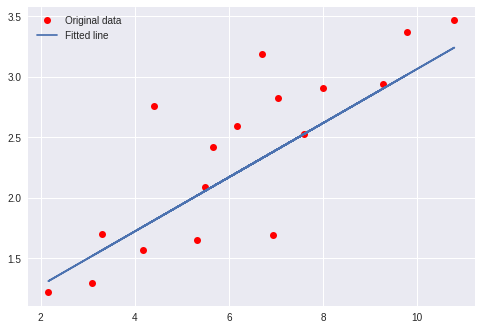

In [32]:
# Fit all training data
for epoch in range(training_epochs):
  for (x, y) in zip(train_X, train_Y):
    sess.run(optimizer, feed_dict={X: x, Y: y})

    # Display logs per epoch step
    if (epoch+1) % display_step == 0:
      c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
      print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
              "W=", sess.run(W), "b=", sess.run(b))

print("Optimization Finished!")

# Print the cost, weight and bias after the model training
training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    
# Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
plt.legend()
plt.show()

testing the trained model

Testing... (Mean square loss Comparison)
Testing cost= 0.80686665
Absolute mean square loss difference: 0.71674633


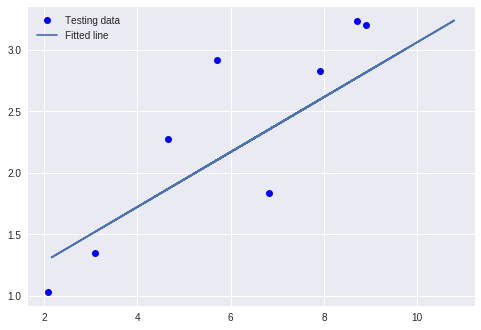

In [33]:
# Testing example:
test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

print("Testing... (Mean square loss Comparison)")
# testing_cost = sess.run(tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),feed_dict={X: test_X, Y: test_Y})  # same function as cost above
testing_cost = sess.run(tf.reduce_sum(tf.pow(pred - Y, 2)) / (2),feed_dict={X: test_X, Y: test_Y})  # same function as cost above
print("Testing cost=", testing_cost)
print("Absolute mean square loss difference:", abs(training_cost - testing_cost))

plt.plot(test_X, test_Y, 'bo', label='Testing data')
plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
plt.legend()
plt.show()


predict output for new value

In [34]:
#Predicting output on new value:
print("For new value '3.5'...\n")
print("Predicted output:", sess.run(pred,feed_dict={X: 3.5}))

For new value '3.5'...

Predicted output: 1.611104


#Entering new value through Form

In [0]:


#@title Enter a new value { form-width: "100%" }
New_X = 3.5 #@param {type:"number"}



In [36]:
#Predicting output on new value:
print("For new value...\n")
print("Predicted output:", sess.run(pred,feed_dict={X: New_X} ))

For new value...

Predicted output: 1.611104


In [0]:
sess.close()